In [151]:
import matplotlib.pyplot as plt

In [65]:
import pandas as pd
import os.path


pot = os.path.join('Nova mapa','avti.csv')
# naložimo razpredelnico, s katero bomo delali
avti = pd.read_csv('avti.csv')
avti5 = pd.read_csv('avti.csv')
# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 20


In [6]:

avti


,Znamka,Model,cena,Prevozeni Km,Prva registracija,gorivo,menjalnik,prostornina motorja,moc v KM,moc v KW,ID
0,Opel,Astra,22990,136000,2003,bencinski motor,ročni menjalnik,1598.0,101.0,74,1
1,Honda,Accord,1200,246300,2002,bencinski motor,ročni menjalnik,1850.0,136.0,100,2
2,Volkswagen,Passat,13990,121000,2016,diesel motor,avtomatski menjalnik,1598.0,120.0,88,3
3,BMW,serija 3:,14490,155120,2014,diesel motor,avtomatski menjalnik,1995.0,184.0,135,4
4,Volkswagen,Passat,2990,232000,2008,diesel motor,ročni menjalnik,1968.0,140.0,103,5
...,...,...,...,...,...,...,...,...,...,...,...
940,Renault,Thalia,1300,133000,2004,bencinski motor,ročni menjalnik,1390.0,75.0,55,941
941,Volkswagen,Passat,15490,87000,2015,diesel motor,ročni menjalnik,1968.0,150.0,110,942
942,Chevrolet,Cruze,3990,118000,2010,bencinski motor,ročni menjalnik,1796.0,141.0,104,943
943,Mercedes-Benz,C-Razred,20490,110000,2015,diesel motor,avtomatski menjalnik,2143.0,170.0,125,944


,Znamka,Model,cena,Prevozeni Km,Prva registracija,gorivo,menjalnik,prostornina motorja,moc v KM,moc v KW,ID,petletje
682,Cadillac,DeVille,5000,100000,1972,bencinski motor,avtomatski menjalnik,7777.0,204.0,150,683,1970
139,Volkswagen,Hroč,6200,56000,1973,bencinski motor,ročni menjalnik,NaN,46.0,34,140,1970


In [69]:
avti5['petletje'] = 5 * (avti['Prva registracija'] // 5)

,Znamka,Model,cena,Prevozeni Km,Prva registracija,gorivo,menjalnik,prostornina motorja,moc v KM,moc v KW,ID
0,Opel,Astra,22990,136000,2003,bencinski motor,ročni menjalnik,1598.0,101.0,74,1
1,Honda,Accord,1200,246300,2002,bencinski motor,ročni menjalnik,1850.0,136.0,100,2
2,Volkswagen,Passat,13990,121000,2016,diesel motor,avtomatski menjalnik,1598.0,120.0,88,3
3,BMW,serija 3:,14490,155120,2014,diesel motor,avtomatski menjalnik,1995.0,184.0,135,4
4,Volkswagen,Passat,2990,232000,2008,diesel motor,ročni menjalnik,1968.0,140.0,103,5
...,...,...,...,...,...,...,...,...,...,...,...
940,Renault,Thalia,1300,133000,2004,bencinski motor,ročni menjalnik,1390.0,75.0,55,941
941,Volkswagen,Passat,15490,87000,2015,diesel motor,ročni menjalnik,1968.0,150.0,110,942
942,Chevrolet,Cruze,3990,118000,2010,bencinski motor,ročni menjalnik,1796.0,141.0,104,943
943,Mercedes-Benz,C-Razred,20490,110000,2015,diesel motor,avtomatski menjalnik,2143.0,170.0,125,944


In [ ]:
Poglejmo kako se je spreminjala prostornina motorja čez leta

<AxesSubplot:xlabel='petletje'>

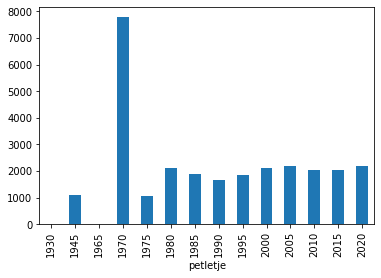

In [81]:

avti5.groupby('petletje').mean()['prostornina motorja'].plot.bar()

Prostornina motorja se čez leta ne spreminja. Samo en avto v petletju 1970 ima navedeno prostornino motorja in je enaka 7777, 
zato je v tem letu tako odstopanje.

In [82]:
avti5[avti5.petletje == 1970].sort_values('prostornina motorja', ascending='True')

,Znamka,Model,cena,Prevozeni Km,Prva registracija,gorivo,menjalnik,prostornina motorja,moc v KM,moc v KW,ID,petletje
682,Cadillac,DeVille,5000,100000,1972,bencinski motor,avtomatski menjalnik,7777.0,204.0,150,683,1970
139,Volkswagen,Hroč,6200,56000,1973,bencinski motor,ročni menjalnik,NaN,46.0,34,140,1970


Poglejmo še spreminjanje moči motorja

<AxesSubplot:xlabel='petletje'>

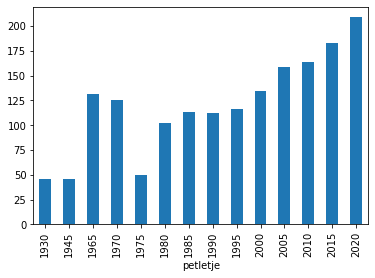

In [78]:
avti5.groupby('petletje').mean()['moc v KM'].plot.bar()

Vidimo, da se čez leta viša. odstopanja v petletju 1965 in 1970 so iz istih razlogov, kot pri prejšnem grafu.

Spreminjanje goriva v avtih čez leta

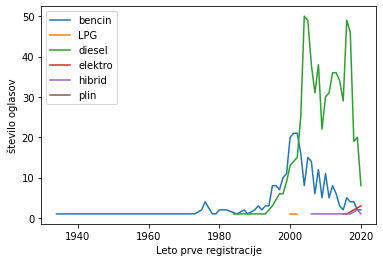

In [182]:
a = avti[avti.gorivo=='bencinski motor'].groupby('Prva registracija').size().plot(legend=True)
b = avti[avti.gorivo=='LPG avtoplin'].groupby('Prva registracija').gorivo.count().plot(legend=True)
c = avti[avti.gorivo=='diesel motor'].groupby('Prva registracija').ID.count().plot(legend=True)
d = avti[avti.gorivo=='elektro pogon'].groupby('Prva registracija').ID.count().plot(legend=True)
e = avti[avti.gorivo=='hibridni pogon'].groupby('Prva registracija').ID.count().plot(legend=True)
f = avti[avti.gorivo=='plin'].groupby('Prva registracija').ID.count().plot(legend=True, xlabel='Leto prve registracije', ylabel='število oglasov').legend(['bencin', 'LPG', 'diesel', 'elektro','hibrid','plin'])


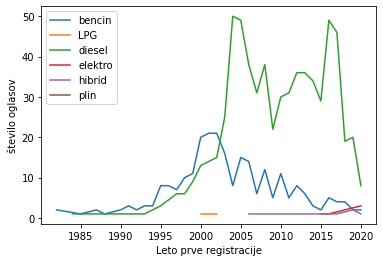

In [183]:
a = avti[(avti.gorivo=='bencinski motor') & (avti['Prva registracija'] > 1980)].groupby('Prva registracija').size().plot(legend=True)
b = avti[avti.gorivo=='LPG avtoplin'].groupby('Prva registracija').gorivo.count().plot(legend=True)
c = avti[avti.gorivo=='diesel motor'].groupby('Prva registracija').ID.count().plot(legend=True)
d = avti[avti.gorivo=='elektro pogon'].groupby('Prva registracija').ID.count().plot(legend=True)
e = avti[avti.gorivo=='hibridni pogon'].groupby('Prva registracija').ID.count().plot(legend=True)
f = avti[avti.gorivo=='plin'].groupby('Prva registracija').ID.count().plot(legend=True, xlabel='Leto prve registracije', ylabel='število oglasov').legend(['bencin', 'LPG', 'diesel', 'elektro','hibrid','plin'])


In [ ]:
Cena v odvisnosti od leta prve registracije

<AxesSubplot:xlabel='Leto prve registracije', ylabel='Cena v €'>

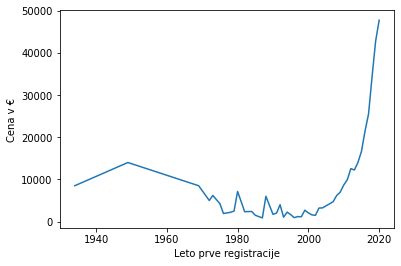

In [174]:
avti.groupby('Prva registracija').mean().cena.plot(xlabel='Leto prve registracije', ylabel='Cena v €')

Ni presenetljivo, da so novejši avti dražji.


Še graf spreminjanja cene od leta 2000 naprej.

<AxesSubplot:xlabel='Leto prve registracije', ylabel='Cena v €'>

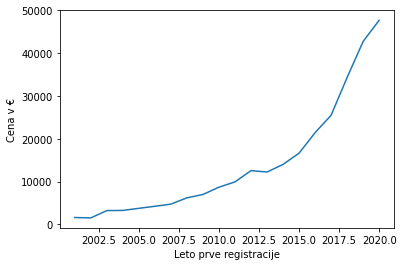

In [175]:
avti[avti['Prva registracija'] > 2000].groupby('Prva registracija').mean().cena.plot(xlabel='Leto prve registracije', ylabel='Cena v €')

Število oglasov glede na leto prve registracije.

<AxesSubplot:xlabel='Leto prve registracije', ylabel='število oglasov'>

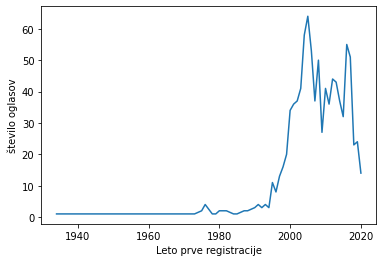

In [184]:
avti5.groupby('Prva registracija').size().plot(xlabel='Leto prve registracije', ylabel='število oglasov')

<AxesSubplot:xlabel='Leto prve registracije', ylabel='število oglasov'>

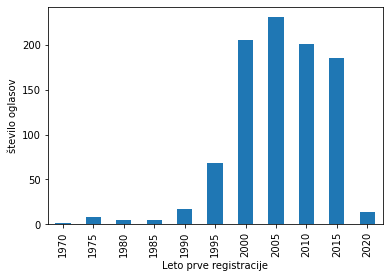

In [185]:
avti5[avti5['petletje']>1968].groupby('petletje').size().plot.bar(xlabel='Leto prve registracije', ylabel='število oglasov')

Največ avtov je letnik med 2000 in 2015 

Število oglasov avtov, glede na letnik-

<AxesSubplot:xlabel='Leto prve registracije', ylabel='število oglasov'>

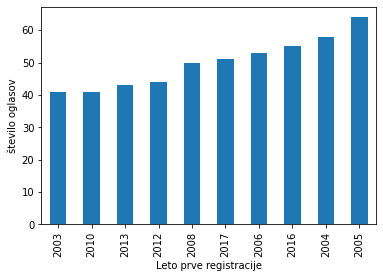

In [177]:
avti.groupby('Prva registracija').size().sort_values().tail(n=10).plot.bar(xlabel='Leto prve registracije', ylabel='število oglasov')

Odvisnost povprečne cene avta, od moči motorja

In [196]:
avti5['moc na 50 KM'] = (avti['moc v KM'] // 50) * 50
avti5['prostornina na 100'] = (avti['prostornina motorja'] // 100) * 100

<AxesSubplot:xlabel='Moč motorja v KM', ylabel='cena v €'>

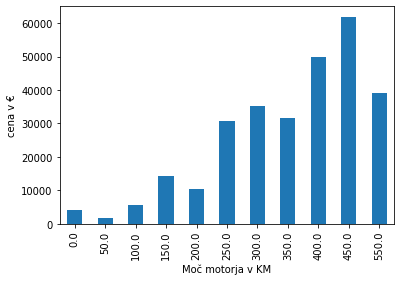

In [197]:
avti5.groupby('moc na 50 KM').cena.mean().plot.bar(xlabel='Moč motorja v KM', ylabel='cena v €')

In [193]:
avti5['prevozeni na 10000'] = (avti['Prevozeni Km'] // 40000) * 40000 + 40000

Odvisnost cene avta od prevoženih kilometrov

<AxesSubplot:xlabel='Moč motorja v KM', ylabel='cena v €'>

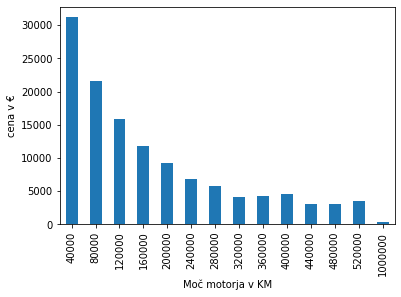

In [194]:
avti5.groupby('prevozeni na 10000').cena.mean().plot.bar(xlabel='Moč motorja v KM', ylabel='cena v €')